<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_142~181_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 합성곱 신경망
* 합성곱 신경망: 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용됨. 대표적으로 이미지 분류, 객체 탐지, 스타일 전이를 예로 들 수 있음.

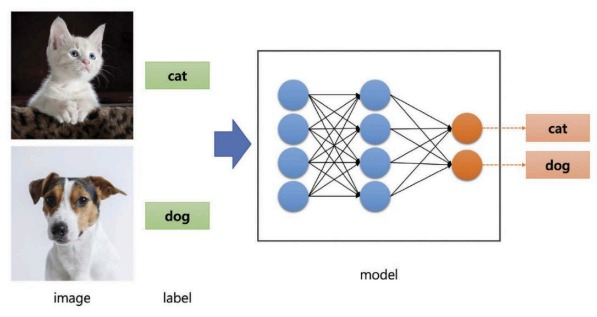

* 고양이 또는 강아지 사진으로 모델을 학습시키면, 모델은 이미지의 특징을 추출해 고양이 또는 강아지를 분류할 수 있게 됨. 즉, 이미지를 인식할 수 있는 능력을 모델이 갖추게 됨.



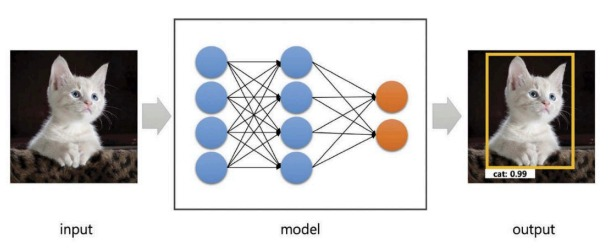

* 객체 탐지: 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술
* 고양이 이미지의 위치에 표시된 노란색 실선을 경계 박스라고 부름
* 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려줌
* 일반적으로 객체의 위치는 이미지의 좌표 값으로 나타내기 때문에, 경계 박스를 찾는 문제는 회귀분석으로 해결. 반면 클래스를 예측하는 문제는 분류 문제가 됨.

## 1-1 이미지 표현
* 이미지를 컴퓨터가 이해할 수 있게 하려면 숫자료 표현해야 함.

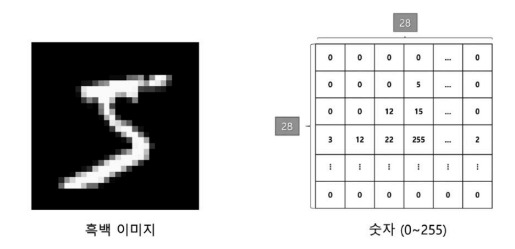

* 왼쪽에 있는 손글씨 이미지는 오른쪽 그림과 같이 0~255 사이의 숫자로 각 픽세르이 화소 값을 나타내는 방식으로 표현할 수 있음.
* 숫자 0은 완전히 검은 색을 나타내고 숫자 255는 흰색을 나타냄. 그 중간에 있는 숫자들은 회색으로 표현.
* 화소를 나타내는 숫자는 이미지의 강도를 나타내고, 숫자가 클수록 더 강한 특성을 나타낸다고 이해할 수 있음.


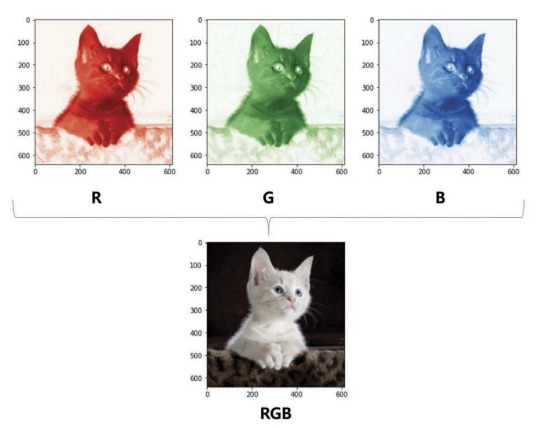

* 컬러 이미지는 R(빨강), G(초록), B(파랑) 채널로 구성된 3장의 이미지를 겹쳐서 표현
* 각 채널 이미지는 채널이 1개인 흑백 이미지와 마찬가지로 0~255 사이의 숫자로 나타냄
* 숫자가 클수록 해당 색을 더 강하게 표현
* 여기서 채널은 각각이 하나의 이미지로 구분되며, 컬러 이미지는 3개의 채널 이미지를 하나로 결합하여 표현하는 방식

## 1-2 합성곱
* 합성곱 연산: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법을 말함.
* 합성곱 연산을 통해서 추출된 이미지를 특성맵이라고 부름. 이렇게 추출된 특성맵을 딥러닝 모델 학습에 사용하면 훨씬 더 좋은 성능을 보임.

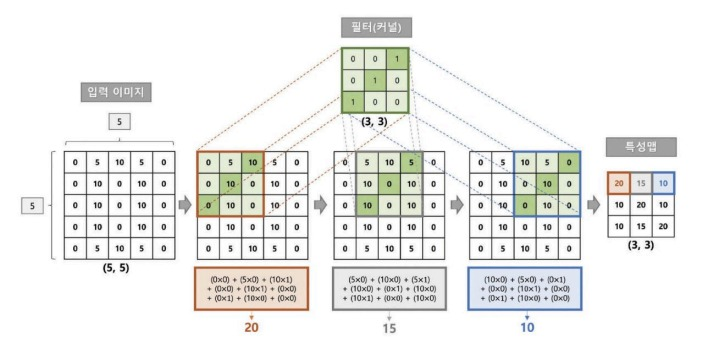

* 입력 이미지의 크기는 (세로, 가로) 순서로 shape이 출력됨.
* 이러한 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영. 입력 이미지와 커널이 겹치는 부분에 대하여 합성곱 연산을 수행하게 됨.
* 합성곱 연산은 element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나옴. 이렇게 나온 결과는 추출된 이미지인 feature map의 좌측 상단의 첫 번째 값이 됨.
* 커널 사이즈가 3 x 3인 경우 총 9개의 가중치를 가지며 오차 역전파 시 커널의 가중치를 업데이트.
* 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 공유 가중치 때문.
* 오차 역전파 시 커널의 그래디언트를 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점이 있음.

## 1-3 채널(channel)
* 채널: 입력 이미지를 구성하는 2차원 배열의 개수를 나타냄
* 흑백 이미지는 단일 채널, 즉 채널의 개수가 1인 이미지. 하지만 컬러 이미지의 경우 R, G, B, 3개의 채널을 가지는 이미지이므로 Red, Green, Blue 채널 이미지 3장이 겹쳐서 컬러 이미지로 표현됨.
* 컬러 이미지는 3개의 채널을 가지므로 앞서 언급한 세로 5픽셀, 가로 5픽셀 컬러 이미지를 shape으로 나타냈을 때는 (5, 3, 3)으로 표현됨.
* 컬러 이미지와 같이 입력 이미지가 여러 개의 채널을 갖는 경우, 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용하여 합성곱 연산을 수행.
* 이 과정을 거치면 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵이 생성됨.

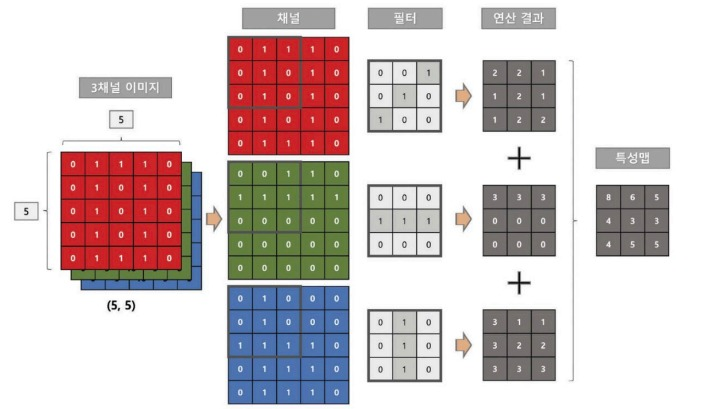

* 만약 합성곱 레이어에 출력 필터의 개수를 20개로 설정했다면, 입력 이미지의 채널 개수 3개와 출력 필터의 개수 20개가 곱해져서 총 60개의 커널이 생성됨.
* 1개 커널의 사이즈가 3 x 3으로 설정했다면, (3 x 3 x 입력 채널 수 x 출력 필터 수) = 3 x 3 x 3개(R, G, B) x 20(출력 필터 수) = 540개가 됨. 즉, 해당 층에서 업데이트할 가중치의 그래디언트는 540개가 됨.
* 여기에 bias가 추가로 계산되는데 20개의 출력 필터 개수만큼 추가됨. 즉, 20개의 bias가 추가되어 총 560개의 파라미터가 업데이트될 파라미터의 개수가 됨.

## 1-4 스트라이드(stride)
* 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나감. 이때 이동하는 간격을 스트라이드로 정의하며, 주로 1 또는 2로 설정.
* 스트라이드를 1로 설정 시 커널은 우측으로 1픽셀씩 이동하게 되며, 커널이 입력 이미지의 우측 끝까지 이동했다면 아래 방향으로 1칸 좌측 첫 픽셀로 이동하여 추출.
* 스트라이드를 2로 설정하게 되면 2픽셀씩 건너뛰기 때문에 특성맵의 크기가 1/2로 줄어들게 됨.

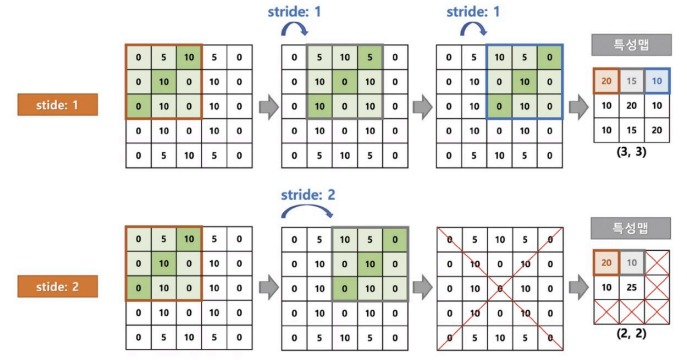

* 텐스플로 케라스에서 제공하는 Conv2D 레이어의 strides 매개변수에 스트라이드를 지정할 수 있음

## 1-5 패딩(padding)
* 커널 크기가 3 x 3이고, 스트라이드에서 1로 설정하게 되는 경우에도 추출된 특성맵의 사이즈는 입력 이미지 대비 가로로 2픽셀, 세로로 2픽셀씩 줄어들게 됨.
* 하지만 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩을 설정할 수 있음.
* 일반적으로 zero-padding을 사용하게 되며, 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출하게 됨.
* 패딩을 적용한 후 합성곱 연산을 수행하게 되면 특성맵의 크기가 줄어들지 않음.

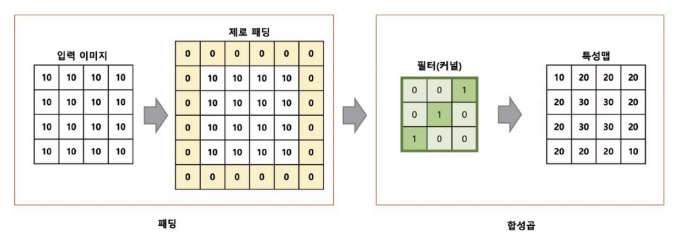

* 텐서플로 케라스의 Conv2D 레이어에서 padding = "same"으로 설정하면 zero_padding을 적용. 기본값은 padding = "valid"

## 1-6 특성맵(feature map) 사이즈
* 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식은 아래와 같음.

* (Output Height, Output Width) = $(\frac{Image Height + 2P - Kernel Height}{S} + 1, \frac{Image Width + 2P - Kernel Width}{S} + 1)$
 * Image Height, Image Width: 입력 크기
 * Kernel Height, Kernel Width: 필터 크기
 * S: 스트라이드
 * P: 패딩
 * Output Height, Output Width: 출력 크기

## 1-7 풀링(pooling)
* 풀링 레이어: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
* 풀링 레이어를 사용하면서 얻을 수 있는 이점으로는 이미지 축소를 통해 연산량을 감소한다는 점과 과대적합을 방지함에 있음.
* 풀링 레이어는 크게 최대 풀링과 평균 풀링으로 나뉨.
* 최대 풀링: 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었으며 생각보다 좋은 성능을 발휘하기 때문에 합성곱 신경망과 같이 주로 사용됨.

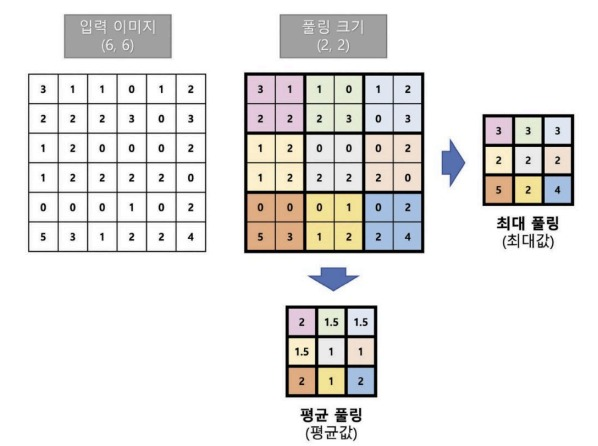

* 최대 풀링 수행 시 커널의 크기가 2 x 2로 주어질 때 입력 이미지의 2 x 2 픽셀 중 최대값이 출력 값으로 설정됨.
* 평균 풀링을 수행하면 2 x 2 픽셀들의 평균 값이 출력 값으로 나옴.
* 풀링 레이어도 역시 스트라이드 값을 가지며 스트라이드를 2로 설정하면, 2칸씩 건너뛰면서 풀링을 수행.
* 최대 풀링의 커널 크기를 2 x 2로 설정하고 스트라이드를 2로 설정 시 출력 이미지는 입력 이미지 대비 세로 1/2, 가로 1/2로 줄어들어 입력 이미지 대비 총 1/4 크기로 줄어듦.

#02 간단한 모델 생성
* mnist 손글씨 데이터셋을 가지고 간단한 구조의 합성곱 신경망 모델을 생성

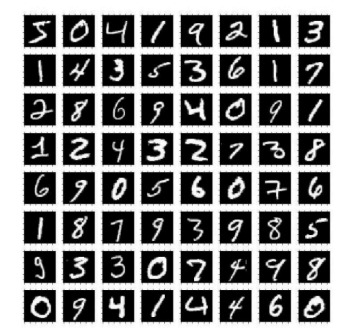

## 2-1 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

* 데이터셋을 불러오면 훈련 셋과 검증 셋으로 구분해서 튜플 형태로 정리.
* 훈련 셋의 개수는 60,000개, 검증 셋의 개수는 10,000개.
* 가로, 세로 각각 28픽셀인 손글씨 이미지와 손글씨가 나타내는 숫자 레이블이 매칭되어 있음.

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


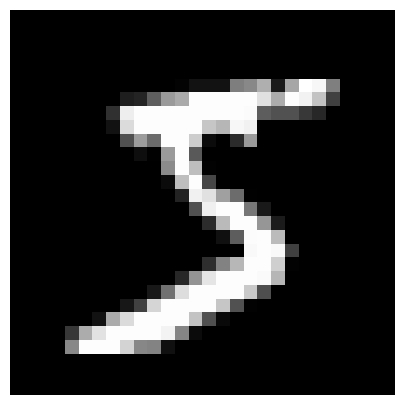

In [3]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize = (5, 5))
  plt.imshow(data[idx], cmap = "gray")
  plt.axis("off")
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


* 딥러닝 모델의 안정적인 학습을 위해서 입력 이미지 픽셀 값을 정규화 변환
* 이미지 픽셀 값을 최대값 255로 나누어 주면 0~1범위로 스케일이 정규화됨

In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


* mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성됨.
* CNN 모델에 주입하기 위해서 색상을 나타내는 채널을 추가해 줌
* (60000, 28, 28) 형태의 텐서가 (60000, 28, 28, 1) 형태로 변환됨

In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## 2-2 Sequential API로 모델 생성 및 학습
* Sequential API를 사용하여 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델을 생성
* 최종 부류기로 Dense 레이어를 적용하기 위해, Flatten 층을 추가하여 1차원 배열로 펼쳐줌.
* 합성곱은 Conv2D 레이어를 사용하고 (3, 3) 크기의 서로 다른 32가지 종류의 커널을 적용 후 ReLU 활성화 함수를 적용
* name 속성에 레이어의 이름은 "conv"라고 지정

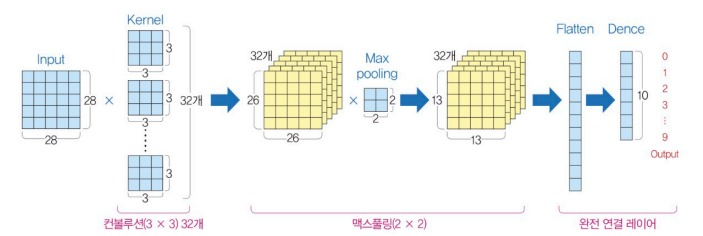

* 풀링 레이어는 (2, 2) 크기로 최대 풀링을 적용하고, 레이어 이름 속성도 추가
* 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수를 10으로 하고, 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax를 적용

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu",
                           input_shape = (28, 28, 1), name = "conv"),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name = "pool"),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax")
])

* 앞서 정의한 모델 구조에 옵티마이저, 손실함수, 평가지표를 설정해 주고 컴파일하면 모델 인스턴스가 생성됨
* fit() 메소드에 훈련 셋과 검증 셋을 주입하고, epoch를 10으로 지정
* 코드 셀을 실행하면 모델이 학습하면서 epcoh당 손실과 평가 결과를 출력
* 두 번째 epoch를 마친 상태에서도 훈련 셋과 검증 셋 모두 97%에 가까운 정확도를 보임

In [8]:
# 모델 컴파일
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.2114 - accuracy: 0.9414 - val_loss: 0.0842 - val_accuracy: 0.9746
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0769 - accuracy: 0.9774 - val_loss: 0.0683 - val_accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0549 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0482 - accuracy: 0.9858 - val_loss: 0.0553 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0537 - val_accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0507 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0514 - val_accuracy

* evaluate() 메소드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여 손실과 평가지표를 계산
* 검증 셋에 대해서 약 98%의 정확도를 나타냄

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0548 - accuracy: 0.9838


[0.054800476878881454, 0.9837999939918518]

* 모델 훈련 단계에서 훈련 결과를 history 객체에 저장
* 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의하고 실행
* 그래프를 보면 훈련 셋에 대한 손실은 계속 줄어드는데 검증 셋의 손실은 어느 수준에서 더 이상 낮아지지 않음
* 4 epoch 이후부터는 모델이 과대적합으로 진행되었다는 것을 파악할 수 있음


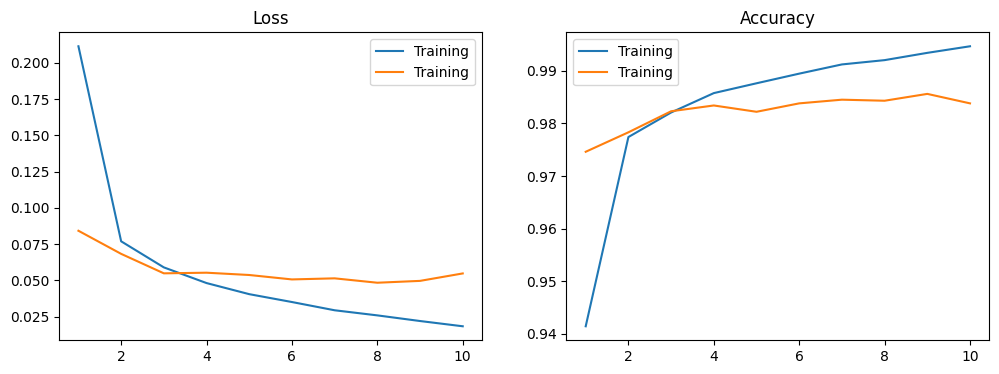

In [10]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history["loss"], history.history["val_loss"]
  acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]

  fig, axes = plt.subplots(1, 2, figsize = (12, 4))

  axes[0].plot(range(1, epoch + 1), loss, label = "Training")
  axes[0].plot(range(1, epoch + 1), val_loss, label = "Training")
  axes[0].legend(loc = "best")
  axes[0].set_title("Loss")

  axes[1].plot(range(1, epoch + 1), acc, label = "Training")
  axes[1].plot(range(1, epoch + 1), val_acc, label = "Training")
  axes[1].legend(loc = "best")
  axes[1].set_title("Accuracy")

  plt.show()

plot_loss_acc(history, 10)

## 2-3 모델 구조 파악
* 모델 인스턴스에 summary() 메소드를 적용해 주면, 모델의 구조를 요약해서 보여줌
* 각 레이어의 이름과 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터 개수를 알 수 있음.
* (28, 28, 1) 형태의 입력 텐서가 Conv2D를 거치면서 (26, 26, 32) 형태로 변환됨.
* (3, 3) 크기의 합성곱 필터를 사용하기 때문에 이미지 가로, 세로 크기가 2씩 줄어들음 (여기서 패딩은 적용되지 않음)
* 서로 다른 32개의 필터를 적용했기 때문에 (26, 26) 크기의 특성맵이 32개 생성됨
* 즉, (28, 28,1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처(특징)를 추출하는 것

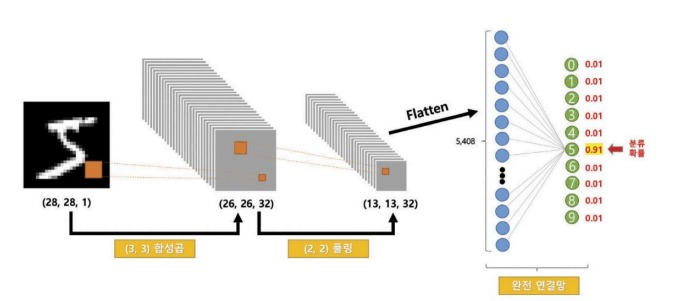

* (2, 2) 크기의 풀링 레이어를 적용했기 때문에 이미지 크기가 1/2로 줄어들음. 따라서 풀링 레이어를 거치면 (13, 13, 32) 텐서로 변환되고, Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5,408개 (13 x 13 x 32) 원소를 갖는 1차원 벡터가 됨.
* 이 벡터를 출력 노드 10개인 Desne 레이어로 보내면 최종 분류 값을 예측해 출력
* 즉, 이미지를 입력받아 특징을 추출하고 이미지가 나타내는 숫자를 예측할 수 있음.

In [11]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서를 추출할 수 있음.
* 입력 텐서는 (None, 28, 28, 1) 형태인데, 가장 앞에 있는 축의 None 값은 배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능하다는 의미

In [12]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

* 모델의 출력 텐서는 output 속성으로 선택할 수 있음.
* 10개의 노드를 갖는 1차원 벡터 형태

In [13]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

* 모델을 구성하는 레이어들을 추출하려면 layers 속성을 확인
* 파이썬 리스트 형태로 레이어 객체를 담아서 보여줌

In [14]:
# 레이어
model.layers

* 우리가 작성한 모델은 4개의 레이어로 구성됨
* 파이썬 리스트 인덱싱을 적용해서 첫 번째 레이어를 선택하면 다음과 같음
* 첫 번째 인덱스는 0이고, 가장 앞에 있는 Conv2D 레이어를 추출하게 됨.

In [15]:
# 첫 번째 레이어 선택
model.layers[0]

* 각 레이어에 입력되는 텐서를 따로 선택하는 것도 가능
* 앞의 Conv2D 레이어에는 모델의 입력 데이터가 그대로 들어가기 때문에 (None, 28, 28, 1) 형태를 가짐

In [16]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

* 마찬가지로 각 레이어에서 출력되는 텐서를 확인할 수 있음
* Conv2D 레이어를 거치면 픽셀 사이즈가 2씩 줄어들고 채널 개수가 32개로 늘어나면서, (None, 26, 26, 32) 형태를 가짐

In [17]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

* weights 속성을 각 레이어 인스턴스에 적용하여 각 레이어의 가중치 행렬을 추출할 수 있음.
* 2개의 텐서플로 변수 행렬이 확인되는데, 첫 번째 변수는 "conv/kernel:0" 라는 이름과 같이 커널 행렬의 가중치를 나타내고, 두 번째 변수는 "conv/bias:0"라는 이름에서 알 수 있듯이 각 커널의 상수항을 나타냄

In [18]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.02174892e-02, -1.18419874e+00,  2.41684109e-01,
           -3.46450210e-01, -1.27515638e+00, -6.49147391e-01,
            3.03528726e-01,  4.29618031e-01,  2.37663180e-01,
           -1.01500928e+00, -6.59405649e-01,  4.16485637e-01,
           -2.42491648e-01,  4.62377630e-02,  1.35038644e-01,
           -4.72465724e-01, -7.05154955e-01,  3.65190804e-01,
           -4.49359417e-01, -4.61932272e-01,  2.33189970e-01,
           -2.45439395e-01, -9.74658132e-01, -4.98858064e-01,
           -1.94629744e-01,  2.05787808e-01,  1.69038072e-01,
            5.66386998e-01,  5.09093404e-01,  3.85709524e-01,
            1.51338115e-01, -1.50660709e-01]],
 
         [[ 4.62297499e-01, -3.43018532e-01,  1.39545679e-01,
           -2.05535963e-02, -9.03394580e-01, -1.20297179e-01,
            2.37627223e-01,  1.45820081e-01, -8.08037743e-02,
           -6.22418165e-01, -4.50210214e-01,  1.60210431e-01,
           

* 실행 결과에서 커널 가중치의 shape이 (3, 3, 1, 32) 라는 것을 알 수 있음.
* 여기서 (3, 3)은 필터의 크기, (1)은 입력층의 채널 개수, (32)는 출력층의 채널 개수를 나타냄
* 따라서 layer[0] 커널의 학습(업데이트) 가능한 파라미터 수는 3 x 3 x 1 x 32 = 288개가 됨.
* 상수항 가중치의 shape은 (32,)이고, 이는 출력층의 채널 수를 말함
* 따라서 layer[0]의 총 학습 가능한 파라미터 수는 커널과 상수항을 더해서 288 + 32 = 320개가 됨
* 커널 행렬의 가중치 또는 상수항을 따로 선택할 수도 있음.

In [19]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 3.02174892e-02, -1.18419874e+00,  2.41684109e-01,
          -3.46450210e-01, -1.27515638e+00, -6.49147391e-01,
           3.03528726e-01,  4.29618031e-01,  2.37663180e-01,
          -1.01500928e+00, -6.59405649e-01,  4.16485637e-01,
          -2.42491648e-01,  4.62377630e-02,  1.35038644e-01,
          -4.72465724e-01, -7.05154955e-01,  3.65190804e-01,
          -4.49359417e-01, -4.61932272e-01,  2.33189970e-01,
          -2.45439395e-01, -9.74658132e-01, -4.98858064e-01,
          -1.94629744e-01,  2.05787808e-01,  1.69038072e-01,
           5.66386998e-01,  5.09093404e-01,  3.85709524e-01,
           1.51338115e-01, -1.50660709e-01]],

        [[ 4.62297499e-01, -3.43018532e-01,  1.39545679e-01,
          -2.05535963e-02, -9.03394580e-01, -1.20297179e-01,
           2.37627223e-01,  1.45820081e-01, -8.08037743e-02,
          -6.22418165e-01, -4.50210214e-01,  1.60210431e-01,
          -1.32374108e-01,  

In [20]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.39259905, -0.03640607, -0.30277357, -0.30605143,  0.17704658,
       -0.2634893 , -0.14182325, -0.16708119, -0.09968022, -0.01529563,
       -0.2138014 , -0.00933541, -0.08175891, -0.099121  , -0.3154748 ,
       -0.06757188, -0.10497962, -0.43133408, -0.05267338, -0.3218963 ,
       -0.3818405 , -0.17678344, -0.05846289, -0.14016199,  0.00427682,
       -0.29844645, -0.13989232, -0.04761382,  0.07080372, -0.02853036,
       -0.22431156, -0.0058112 ], dtype=float32)>

* 레이어의 이름을 사용하여 해당 레이어를 선택할 수도 있음
* 모델을 정의할 때 Conv2D 합성곱 레이어의 이름을 "conv"라고 지정해 두었기 때문에, 다음과 같이 추출 가능함.

In [21]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer("conv")

* 모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 activator 모델을 정의
* 첫 번째 샘플에 대하여 각 레이어의 출력을 예측

In [22]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs = model.input,
                           outputs = [layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 240ms/step


2

* 2개의 출력 텐서 중에서 첫 번째는 Conv2D 레이어의 출력
* 텐서의 형태는 (1, 26, 26, 32)인데 여기서 1은 입력 이미지의 개수를 나타냄. 샘플이 1개라는 뜻.

In [23]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

* 첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화
* 출력 이미지의 특징이 조금씩 차이가 있는것을 볼 수 있음.
* 이처럼 각 커널은 입력 이미지로부터 서로 다른 피처(특징)을 추출하는 역할을 함.

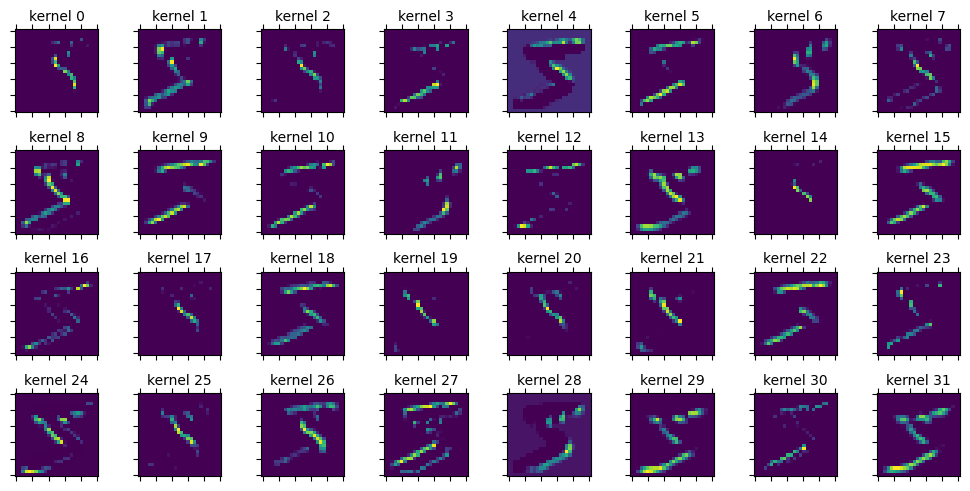

In [24]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap = "viridis")
  axes[i//8, i%8].set_title("kernel %s"%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)

plt.tight_layout()
plt.show()

* 두 번째 레이어는 최대 풀링 레이어. 여기서 출력하는 텐서는 (1, 13, 13, 32) 형태를 가짐.

In [25]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


* 각 커널별로 출력되는 특성맵 이미지를 시각화하면 앞서 Conv2D 출력 이미지에 비하여 화소가 굵어진 것을 볼 수 있음.
* 최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있음.

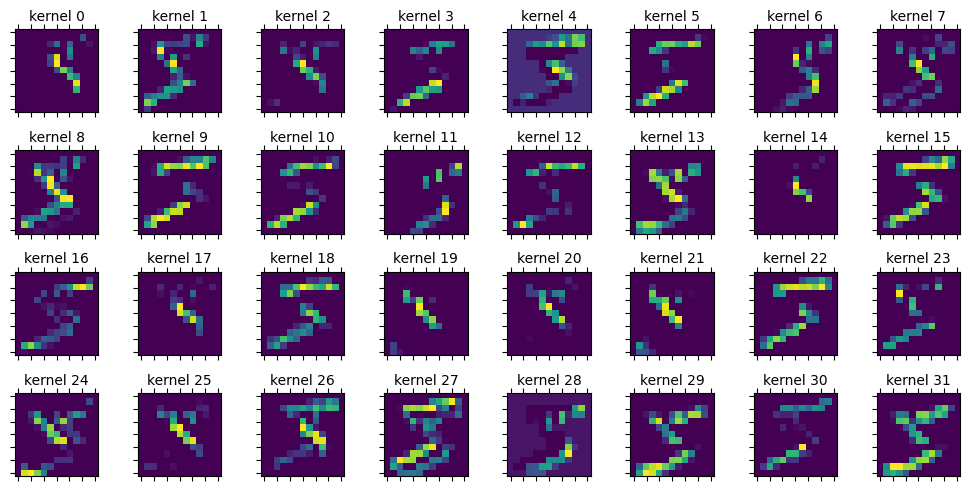

In [26]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap = "viridis")
  axes[i//8, i%8].set_title("kernel %s"%str(i), fontsize = 10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible = False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible = False)

plt.tight_layout()
plt.show()

# 03. 복잡한 모델 생성
* 텐서플로 케라스의 Functional API를 사용하면, Sequential API로 구현할 수 없는 복잡한 구조의 모델을 정의할 수 있음.

## 3-1 데이터셋 준비
* 필요한 라이브러리와 mnist 데이터셋을 불러와서 훈련 데이터셋과 검증 데이터셋으로 구분하여 저장

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


* 원본 mnist 데이터셋은 0~9까지 숫자를 손글씨로 쓴 이미지(x)와 정답(y)를 숫자로 구성되어 있음
* 우리는 0~9까지 숫자를 맞추는 정답 외에 홀수인지 짝수인지를 판단하는 정답을 새로 만들어서 추가해야 함

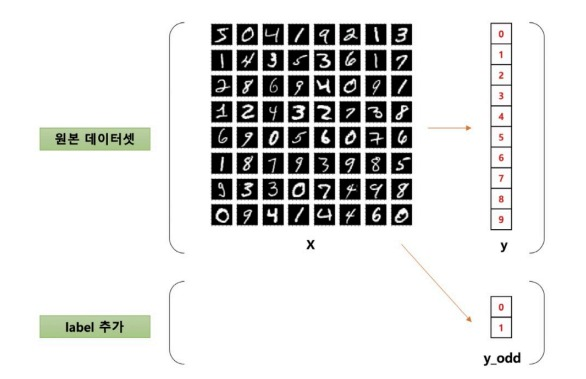

In [31]:
y_train_odd = []  # 새로운 리스트 생성

for y in y_train:
    if y % 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

# 필요한 경우, 리스트를 numpy 배열로 변환
y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

* 원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열을 동시에 출력하여 비교
* 홀수 짝수 여부가 잘 정리된 것을 확인할 수 있음.

In [32]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


* 검증 데이터셋에 대해서도 홀수, 짝수를 나타내는 y_valid_odd 배열을 생성

In [33]:
# Validation 데이터셋 처리
y_valid_odd = []  # 빈 리스트로 초기화
for y in y_valid:
    if y % 2 == 0:
        y_valid_odd.append(0)  # 짝수인 경우 0 추가
    else:
        y_valid_odd.append(1)  # 홀수인 경우 1 추가

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

* 입력 이미지 데이터를 255로 나눠서 정규화
* 색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정
* 텐서플로 expand_dims() 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 지저하면 해당 인덱스에 새로운 축이 추가됨
* 여기서는 축의 인덱스를 -1로 지정했기 때문에 새로운 축은 끝에 추가됨. 즉, (60000, 28, 28) 배열이 (6000, 28, 28, 1) 배열이 됨

In [34]:
# 정규화(Noramlization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성
* Functional API를 사용하면 사용자가 원하는 복잡한 구조의 모델을 만들 수 있음.
* 앞에서 다룬 Sequential API의 경우 레이어를 층층이 한 줄로 연결할 수밖에 없지만, Functional API를 사용하면 다중 입력 또는 다중 출력 같은 구조를 만들 수 있음.
* 함수의 입력과 출력으로 표현할 수 있어서 자ㅠ롭게 모델 구조를 정의할 수 있는 장점이 있음.

In [35]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = "relu")(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation = "softmax")(concat)

model = tf.keras.models.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

* 케라스 utils 모듈의 plot_model 함수를 사용하고, 모델을 입력하면 모델 구조를 그려줌.
* 입력 레이어가 2개의 출력으로 나누어지고, 마지막 Dense 레이어를 통과하기 전에 Concatenate 레이어에서 하나로 합쳐지는 구조를 시각적으로 확인할 수 있음.

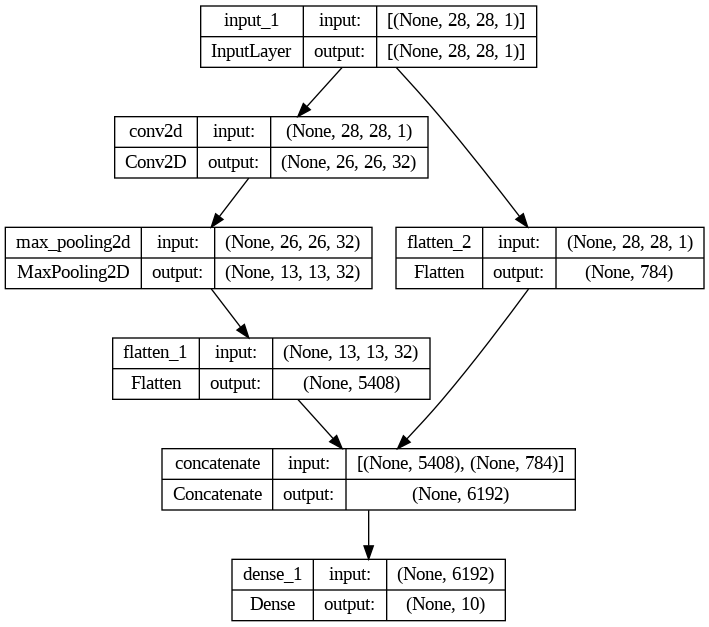

In [36]:
from tensorflow.keras.utils import plot_model

# 모델 구조를 이미지 파일로 저장
plot_model(model, show_shapes=True, show_layer_names=True, to_file="functional_cnn.png")

* 다중 분류 모델에 맞게 손실함수와 평가지표를 지정하고, 옵티마이저로는 adam을 사용
* 10 epoch에 대한 모델 훈련을 마치고 검증 데이터에 대한 모델의 예측 성능을 평가
* 10개의 숫자 레이블으 맞추는 모델의 정확도는 약 98%로서 앞에서 학습했던 Sequential 모델과 큰 차이는 없음.

In [37]:
# 모델 컴파일
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

# 모델 훈련
history = model.fit(x_train, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs =  10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2023 - accuracy: 0.9417 - val_loss: 0.0884 - val_accuracy: 0.9727
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9775 - val_loss: 0.0770 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0571 - val_accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0747 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0573 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0557 - val_accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0573 - val_accuracy:

## 3-3 다중 출력 분류 모델
* 0~9까지 숫자를 맞추는 분류 문제와 홀수, 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델을 정의하느 코드
* 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개를 만드는 것이 핵심

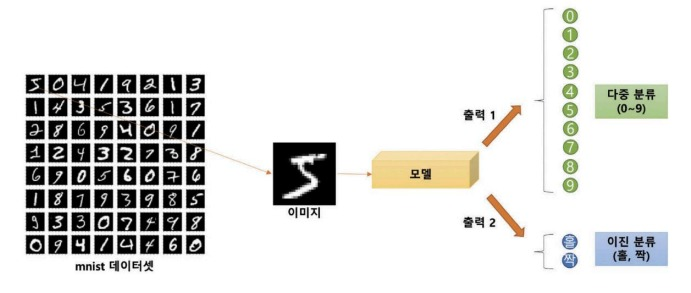

* 즉, 다음 모델은 입력 이미지를 하나 받아서 해당 손글씨가 어떤 숫자인지를 분류하고 홀수인지 여부도 함께 분류하는 문제

In [38]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape = (28, 28, 1), name = "inputs")

conv = tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", name = "conv2d_layer")(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name = "maxpool_layer")(conv)
flat = tf.keras.layers.Flatten(name = "flatten_layer")(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "digit_dense")(concat)

odd_outputs = tf.keras.layers.Dense(1, activation = "sigmoid", name = "odd_dense")(flat_inputs)

model = tf.keras.models.Model(inputs = inputs, outputs = [digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

* 모델의 입력 텐서와 출력 텐서를 화면에 표시
* 입력은 하나이고, 출력은 10개인 텐서와 1개인 텐서로 두 개가 확인

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


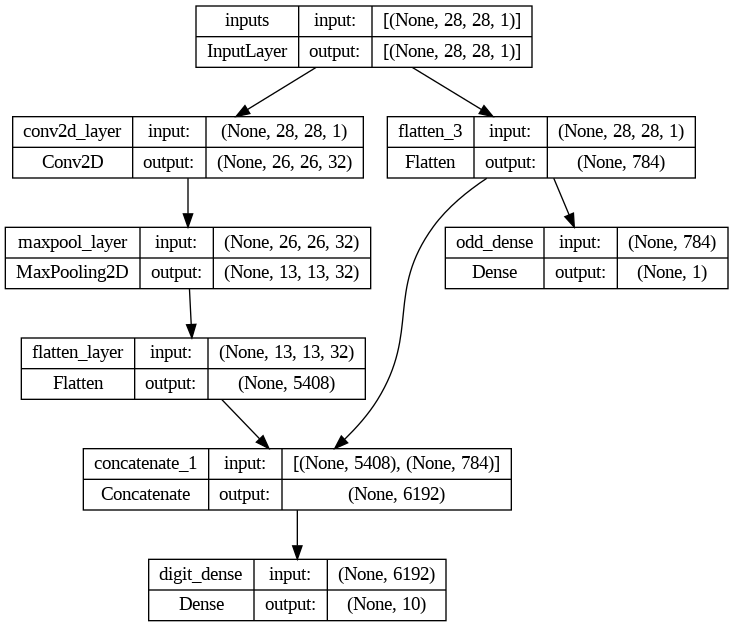

In [40]:
plot_model(model, show_shapes = True, show_layer_names = True, to_file = "multi_output_conn.png")

* 앞서 모델을 정의할 때 각각의 출력 Dense 레이어에 name 속성으로 "digit_dense", "odd_dense"와 같은 이름을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정
* 모델을 훈련시키기 위해 fit() 메소드를 적용할 때도 출력 값을 2개로 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 함.
* 검증 데이터셋에 대해서도 마찬가지로 구분해 지정

In [41]:
# 모델 컴파일
model.compile(optimizer = "adam", loss = {"digit_dense": "sparse_categorical_crossentropy",
                                          "odd_dense": "binary_crossentropy"},
              loss_weights = {"digit_dense": 1, "odd_dense": 0.5},
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 *binary_crossentropy
              metrics = ["accuracy"])

# 모델 훈련
history = model.fit({"inputs": x_train_in}, {"digit_dense": y_train, "odd_dense": y_train_odd},
                    validation_data = ({"inputs": x_valid_in}, {"digit_dense": y_valid,
                                                                "odd_dense": y_valid_odd}), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3602 - digit_dense_loss: 0.1989 - odd_dense_loss: 0.3226 - digit_dense_accuracy: 0.9433 - odd_dense_accuracy: 0.8664 - val_loss: 0.2171 - val_digit_dense_loss: 0.0787 - val_odd_dense_loss: 0.2766 - val_digit_dense_accuracy: 0.9757 - val_odd_dense_accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2100 - digit_dense_loss: 0.0743 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9779 - odd_dense_accuracy: 0.8918 - val_loss: 0.1935 - val_digit_dense_loss: 0.0622 - val_odd_dense_loss: 0.2626 - val_digit_dense_accuracy: 0.9802 - val_odd_dense_accuracy: 0.8979
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1891 - digit_dense_loss: 0.0577 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9826 - odd_dense_accuracy: 0.8956 - val_loss: 0.1856 - val_digit_dense_loss: 0.0560 - val_odd_dense_loss: 0.2590 - val_digit_dense_accuracy: 0.9811 - val_

* 모델 성능 평가

In [42]:
# 모델 성능
model.evaluate({"inputs": x_valid_in}, {"digit_dense": y_valid, "odd_dense": y_valid_odd})

313/313 [==============================] - 1s 4ms/step - loss: 0.1861 - digit_dense_loss: 0.0579 - odd_dense_loss: 0.2564 - digit_dense_accuracy: 0.9841 - odd_dense_accuracy: 0.9018


[0.18607781827449799,
 0.05788310617208481,
 0.2563893496990204,
 0.9840999841690063,
 0.9017999768257141]

* 검증 데이터셋의 인덱스 0에 해당하는 이미지를 출력하면 숫자 7에 대한 손글씨 이미지

In [42]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

def plot_image(data, idx):
  plt.figure(figsize = (5, 5))
  plt.imshow(data[idx])
  plt.axis("off")
  plt.show()

plot_image(x_valid, 0)

* 검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률을 구하면 다음과 같음
* 첫 번째 예측 값은 10개 분류 레이블에 대한 확률을 담고 있고, 두 번째 예측 값은 홀수일 확률을 담고 있음.

In [43]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 2ms/step
[5.4773606e-13 6.9157546e-10 7.0005857e-10 1.9848154e-07 4.4433420e-12
 1.2092870e-11 2.7882724e-20 9.9999976e-01 1.2346950e-09 1.4600085e-08]
[0.9995701]


* 넘파이 argmax 함수를 이용하여 예측 확률을 실제 정답 레이블로 반환
* 검증 데이터셋의 첫 10개 이미지에 대한 예측 레이블은 다음과 같고 첫 번째 이미지를 7로 예측

In [44]:
digit_labels = np.argmax(digit_preds, axis = 1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

* 홀수, 짝수 여부에 대한 예측 레이블을 출력하면 다음과 같음
* 임계값으로 0.5를 지정했는데, 홀수일 확률이 0.5보다 큰 경우 홀수로 분류

In [45]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-45-cb61980817f6>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

## 3-4 전이 학습(Transfer Learning)
* Transfer Learning: 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념

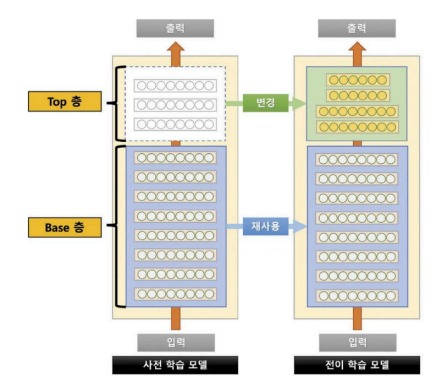

In [46]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer("flatten_layer").output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs = model.input, outputs = base_model_output, name = "base")
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


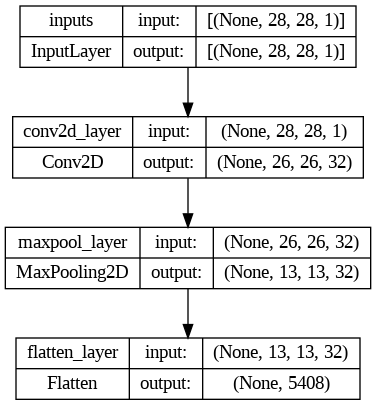

In [47]:
plot_model(base_model, show_shapes = True, show_layer_names = True, to_file = "base_model.png")

* Sequencial API를 사용하여 앞에서 정의한 base_model을 레이어로 추가하고, 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가
* 훈련이 가능하다는 뜻은 모델 훈련 시 파라미터 값이 업데이트 된다는 것

In [48]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation = "softmax")
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


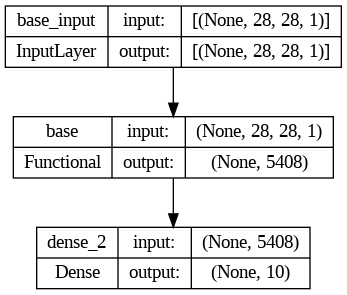

In [49]:
plot_model(digit_model, show_shapes = True, show_layer_names = True, to_file = "digit_model.png")

In [54]:
# 모델 컴파일
digit_model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
                    metrics = ["accuracy"])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data = (x_valid_in, y_valid),
                          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1321 - accuracy: 0.9637 - val_loss: 0.0655 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0541 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0522 - val_accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0590 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9927 - val_loss: 0.0526 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.0588 - val_accuracy:

* 모델 인스턴스는 trainable 속성을 가지고 있음. 이 속성을 False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해서 업데이트되지 않음.

In [55]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs = model.input,
                                          outputs = base_model_output,
                                          name = "base_frozen")
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


* 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용하여 구성

In [56]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation = "softmax")(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs = base_model_frozen.input,
                                           outputs = dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [58]:
# 모델 컴파일
digit_model_frozen.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
                           metrics = ["accuracy"])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train,
                                 validation_data = (x_valid_in, y_valid),
                                 epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1189 - accuracy: 0.9680 - val_loss: 0.0641 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9855 - val_loss: 0.0513 - val_accuracy: 0.9839
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0502 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0540 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0533 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0585 - val_accuracy:

* 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능

In [60]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs = model.input,
                                           outputs = base_model_output,
                                           name = "base_frozen2")
base_model_frozen2.get_layer("conv2d_layer").trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [62]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation = "softmax")(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs = base_model_frozen2.input,
                                           outputs = dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [63]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
                           metrics = ["accuracy"])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train,
                                 validation_data = (x_valid_in, y_valid),
                                 epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1186 - accuracy: 0.9679 - val_loss: 0.0601 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0560 - val_accuracy: 0.9803
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0479 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9934 - val_loss: 0.0621 - val_accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0503 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0555 - val_accuracy: